# Data Visualisation

Heel veel informatie over hoe je visualisatie kan doen met behulp van matplotlib kan je vinden op deze website: https://www.python-graph-gallery.com/.
Specifiek voor pandas vind je ook op [deze](https://pandas.pydata.org/pandas-docs/stable/visualization.html) pagina veel informatie.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Relative to reference point

### Bar diverging

Maak deze figuur zo goed mogelijk na:

![bar diverging plot](images/plot1.png)


Tips:
* Plotting function hlines
* Kleuren van de balken kan je instellen met het color argument
* De axes van een plot kan je ook opvragen met de gca() functie.
* De lijnen in de plot (de grid) kan je aanpassen met de plt.grid() functie
* De kader van het assenstelsel aanpassen kan je doen door de spines van het assenstelsel aan te passen.

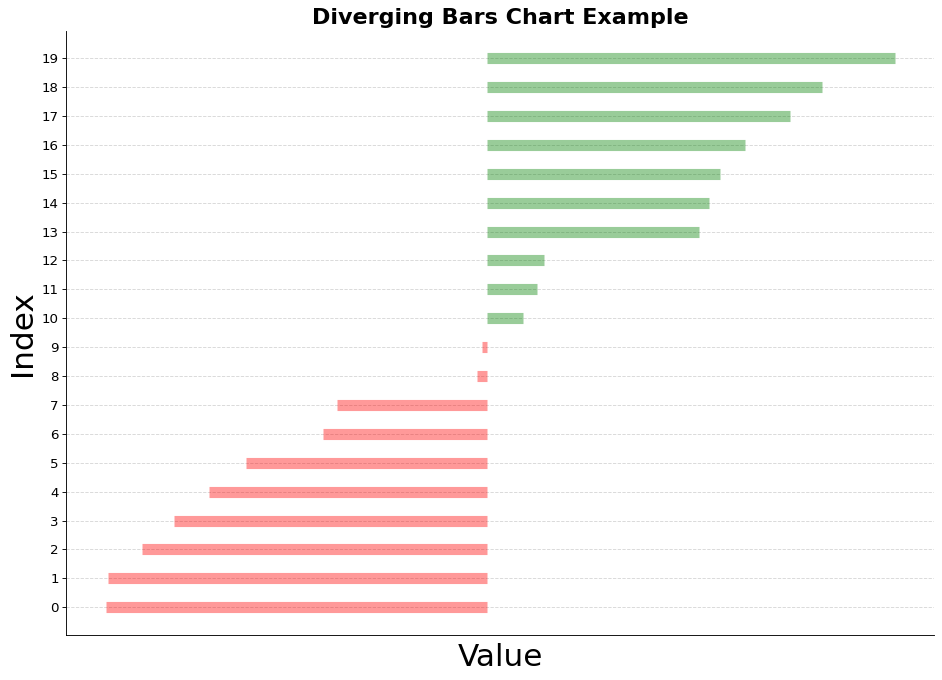

In [2]:
# aanmaken van data
df = pd.DataFrame({"data":np.random.random(size=20)*30+5}) # create random dataframe between 5 and 35
df.sort_values("data", inplace = True) # sorteer by value
df.reset_index(inplace=True) # reset index to ensure index not sorted
df

#basic figure    https://matplotlib.org/stable/api/figure_api.html
plt.figure(figsize=(14, 10), dpi=80)  # size and resolution
#plt.hlines(y=df.index, xmin=20, xmax=df.data) # plot the bars

# maak het breder, voeg aan de hlines linewidth toe
#plt.hlines(y=df.index, xmin=20, xmax=df.data, linewidth=10) # plot the bars

# maak de negatieve rood, de positieve groen
colors = ['red' if float(x) < 20 else 'green' for x in df['data']] # compute desired colors
# plt.hlines(y=df.index, xmin=20, xmax=df.data, linewidth=10, colors=colors) # plot the bars

# maak het minder hard door het transparanter maken van de balken https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html?highlight=hlines#matplotlib.pyplot.hlines
plt.hlines(y=df.index, xmin=20, xmax=df.data, 
           linewidth=10, 
           color=colors, 
           alpha =0.4) # plot the bars

# voeg label toe aan x- en y-as (gca vraagt het assenstelsel op van de huidige figuur)
# voeg de fontsize later toe
# https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes
plt.title('Diverging Bars Chart Example', fontdict={'size': 20, 'weight':'bold'})
plt.gca().set_xlabel("Value", fontsize=28)
plt.gca().set_ylabel("Index", fontsize=28)

# zorg voor een tick per index op de y-as, verwijder de ticks op de x-as
plt.yticks(df.index, df.index, fontsize=12)
plt.xticks([])

# voeg lijnen toe aan het grid
# geen verticale lijnen omdat er geen ticks zijn
plt.grid(linestyle='--', alpha=0.5)

# remove borders on the right and top
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Bar diverging stacked

Je kan ook verschillende balken op dezelfde figuur plaatsen.
Maak nu door gebruik te maken van de barh functie onderstaande figuur zo goed mogelijk na.

![Oef2](plot2.png)

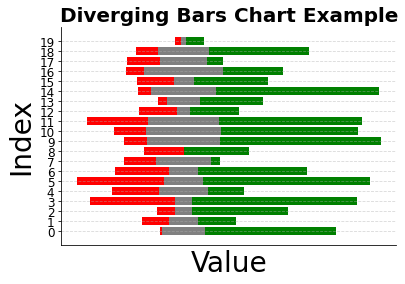

In [40]:
df = pd.DataFrame({"positive":np.random.randint(0,100, size=20),
                  "neutral": np.random.randint(0,50, size=20),
                  "negative": np.random.randint(0,50, size=20)}) # create random dataframe
df

# achter elkaar de rode, grijze en groene plotten. 
#plt.barh(df.index, -df.negative, color = 'red')
#plt.barh(df.index, df.neutral, color = 'gray')
#plt.barh(df.index, df.positive, left=df.neutral, color = 'green')

# centered around the average: (verwijder bovenstaande plots)
plt.barh(df.index, -df.negative, left = -df.neutral/2, color = 'red')
plt.barh(df.index, df.neutral, left = -df.neutral/2, color = 'gray')
plt.barh(df.index, df.positive, left=df.neutral/2, color = 'green')

#kopieer opmaak van hierboven
plt.title('Diverging Bars Chart Example', fontdict={'size': 20, 'weight':'bold'})
plt.gca().set_xlabel("Value", fontsize=28)
plt.gca().set_ylabel("Index", fontsize=28)

# zorg voor een tick per index op de y-as, verwijder de ticks op de x-as
plt.yticks(df.index, df.index, fontsize=12)
plt.xticks([])

# voeg lijnen toe aan het grid
# geen verticale lijnen omdat er geen ticks zijn
plt.grid(linestyle='--', alpha=0.5)

# remove borders on the right and top
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Line Surplus Deficit Filled

Ook is het mogelijk om gebieden op te vullen met de **fill_between functie**.

Maak door gebruik te maken van bovenstaande functie, onderstaande figuur zo goed mogelijk na.

![plot3](plot3.png)

Tips: 
* subplots
* fill_between

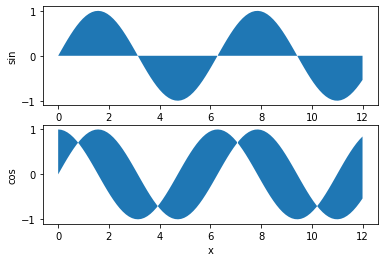

In [4]:
df = pd.DataFrame({"x": np.linspace(0, 12, 100)})
df["sin"] = np.sin(df.x)
df["cos"] = np.cos(df.x)
df

#figuur is de gehele figuur, de axis zijn de individuele assenstelsels
fig, (ax1, ax2) = plt.subplots(2, 1) # 2 plots (2 rijen 1 kolom)
# voeg , sharex=True daarna toe om de x-as te delen
# de tweede argument kan een 0 zijn of een andere functie
ax1.fill_between(df.x, 0, df.sin) # 0 en 2 is het reference point, speel hier een paar keer mee
ax1.set_ylabel('sin')

ax2.fill_between(df.x, df.sin, df.cos)
ax2.set_ylabel('cos')
ax2.set_xlabel('x')

fig.savefig("plot3.png")

## Verband tussen features

### Scatter plot

Reeds veel gedaan dus ga ik hier niet opnieuw tonen

### Line Column Plot

Nu gaan we kijken om te werken met twee assenstelsels.
Dit kan je doen door gebruik te maken van de **twinx()** functie. Zo krijg je een links en rechtse y-as die elk een aparte schaal kunnen hebben.
Maak hiervoor onderstaande figuur zo goed mogelijk na.

![plot4 - line column plot](plot4.png)

Text(0, 0.5, 'Square')

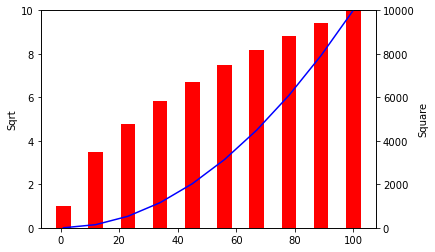

In [56]:
df = pd.DataFrame({"x": np.linspace(1, 100, 10)})
df["square"] = df.x * df.x
df["sqrt"] = np.sqrt(df.x)
df

plt.figure()  
plt.ylim(0.0, 10.0) # doe de ylims achteraf
plt.bar(df.x, df.sqrt, 5, color='red')
plt.ylabel('Sqrt')

# doe eerst de plot zonder de tweede as aan te maken
# leg dan uit dat de tweede as nodig is als de eenheden niet op dezelfde schaal zijn (totaal aantal en besmettingen per 100.000 bijvoorbeeld)
axes2 = plt.twinx()            # creates second axis on the right
axes2.plot(df.x, df.square, color='blue', label='square')
axes2.set_ylim(0,10000) # doe dit achteraf
axes2.set_ylabel('Square')

### Connected scatter plot

Om een geconnecteede scatter plot te maken zijn er twee paden die je kan volgen.
* Ofwel zorg je ervoor dat je zowel een line plot als een scatter plot tekend waardoor de punten aangegeven worden. Let op dat hierbij de data in de juiste volgorde moet staan
* Ofwel gebruik je markers in de line-plot om de datapunten aan te geven. Zie [hier](https://matplotlib.org/stable/api/markers_api.html) voor meer info

Kies een methode en maak onderstaande figuur zo goed mogelijk na

![connected scatter plot](plot5.png)

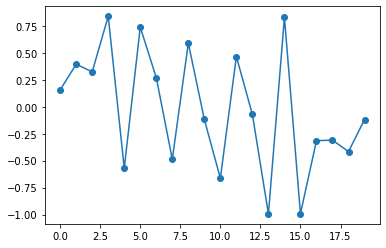

In [57]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y"] = np.random.random(size=20) * 2 -1
df 

plt.figure()  
plt.scatter(df.x, df.y) # Tekent de dots
plt.plot(df.x, df.y) # Connecteert de dots

### Bubble plot

Een bubble plot kan je maken door de **size** parameter van een scatter plot te laten afhangen van een aparte rij.

Oefen dit door deze figuur zo goed mogelijk na te maken:

![bubble plot](plot6.png)

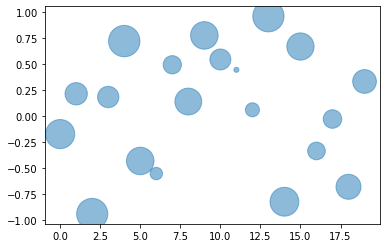

In [62]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y"] = np.random.random(size=20) * 2 -1
df["size"] = np.random.random(size=20) * 1000
df

#plt.scatter(df.x, df.y, s = df.size, alpha=0.5)	 # dit gaat niet werken
plt.scatter("x", "y", s = "size", alpha=0.5, data=df) # dit wel

### XY - heatmap

Dit hebben we ook reeds gedaan bij de correlatie matrices, die ga ik nu niet overdoen. Binnen maptlotlib kan dit met matshow. Seaborn heeft een alternatief dat [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) noemt.

## Plots voor verbanden met de tijd

### (Stacked) Area plot

Met behulp van de stackplot functie kan je verschillende plots boven elkaar leggen.
Oefen dit door onderstaande figuur zo goed mogelijk na te bouwen

![plot 7](plot7.png)

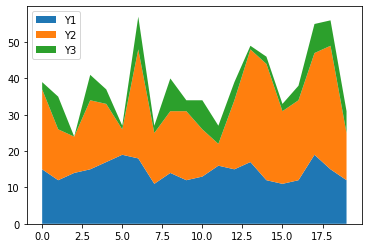

In [63]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y1"] = np.random.randint(10, 20, size=20)
df["y2"] = np.random.randint(5, 40, size=20)
df["y3"] = np.random.randint(0, 10, size=20)
df

plt.stackplot(df.x, df.y1, df.y2, df.y3, labels=['Y1','Y2','Y3'])
plt.legend(loc='upper left')

### Fan plot

Een andere belangrijke plot is een fan plot. Deze kan bijvoorbeeld gebruikt worden om fouten op voorspellingen aan te geven.
Hiervoor moet er vanaf een bepaald punt (het punt waarop de voorspellingen beginnen) een area opgevuld worden om de mogelijke fout aan te geven.

Om dit in te oefenen, maak onderstaande figuur na
De meeste functies hiervoor heb je reeds gezien. Enkel voor de grijze zone na te bootsen kan je gebruik maken van axvspan()

![plot 8](plot8.png)

,x,y,error_1,error_2,error_3
40,40,78,0.0,0.0,0.0
41,41,16,1.0,2.5,3.5
42,42,58,2.0,5.0,7.0
43,43,89,3.0,7.5,10.5
44,44,28,4.0,10.0,14.0
45,45,83,5.0,12.5,17.5
46,46,27,6.0,15.0,21.0
47,47,25,7.0,17.5,24.5
48,48,92,8.0,20.0,28.0
49,49,90,9.0,22.5,31.5


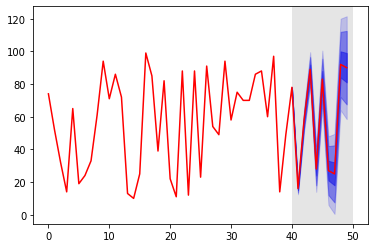

In [41]:
df = pd.DataFrame({"x": np.arange(0, 50)})
df["y"] = np.random.randint(10, 100, size=50)
df_errors = df.tail(10).copy()
df_errors["error_1"] = 50 * 0.2 * (df_errors.x-df_errors.x.min()) / len(df_errors)
df_errors["error_2"] = 50 * 0.5 * (df_errors.x-df_errors.x.min()) / len(df_errors)
df_errors["error_3"] = 50 * 0.7 * (df_errors.x-df_errors.x.min()) / len(df_errors)
display(df)
display(df_errors)

plt.figure()
plt.plot(df.x, df.y, color='red') # Plot the original signal

plt.gca().fill_between(df_errors.x, df_errors.y + df_errors.error_1, df_errors.y - df_errors.error_1, color='blue', alpha=0.6)
plt.gca().fill_between(df_errors.x, df_errors.y + df_errors.error_2, df_errors.y - df_errors.error_2, color='blue', alpha=0.4)
plt.gca().fill_between(df_errors.x, df_errors.y + df_errors.error_3, df_errors.y - df_errors.error_3, color='blue', alpha=0.2)

plt.gca().axvspan(40, 50, facecolor='gray', alpha=0.2)		#hspan is the different direction

### Circles Timeline Plot

Dit kan gegenereerd worden door middel van een scatter plot waar de x-as de tijd is (of een index), de y waarde is een constante (bijvoorbeeld 0) en de bubble size is dan de bijhorende waarde

Probeer dit zelf eens uit met onderstaande data om deze figuur zo goed mogelijk na te maken

![plot 9](plot9.png)

(0.0, 3.0)

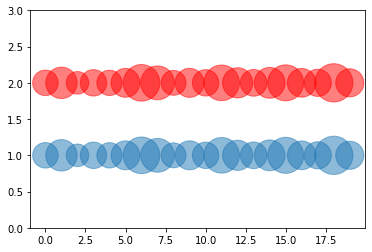

In [78]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y1"] = np.random.random(size=20) * 1000 +500
df["y2"] = np.random.random(size=20) * 2000 +0
display(df)

plt.scatter("x", y=[1] * len(df.y1), s = "y1", alpha=0.5, data=df)
plt.scatter("x", y=[2] * len(df.y1), s = "y1", alpha=0.5, data=df, color="red")
plt.gca().set_ylim(0,3)

### Seismogram plot

Dit kan opnieuw gedaan worden op basis van de vorige voorbeelden. Zoals bij het Connected scatter plot er twee zaken geplot zijn op 1 figuur met dezelfde y-as moeten er hier twee lijn plots zijn. De ene bevat de exacte waarden en de andere een lijn dat de toppen van de golven verbindt. 

Het moeilijke is om de lokale maxima/minima te zoeken die verbonden moet worden. Dit kan eventueel zelf gedaan worden of je kan gebruik maken van een package die dit doet voor jou, bijvoorbeeld: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html of https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

## Sorteren / Volgorde van data

### Lollipop chart

Hiervoor kan je de stem functie gebruiken. Meer informatie over deze functie kan je vinden op [deze website](https://www.python-graph-gallery.com/lollipop-plot/)
Deze kan je inoefenen door onderstaande figuur na te bootsen

![plot 10](plot10.png)

<StemContainer object of 3 artists>

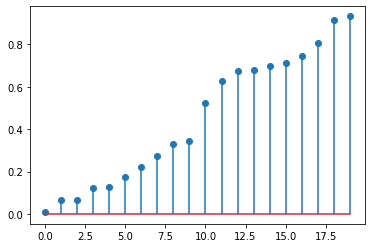

In [5]:
df = pd.DataFrame({'x':range(20), 'y':np.random.uniform(size=20) })
ordered_df = df.sort_values(by='y')
ordered_df.reset_index(inplace=True)
display(df)

plt.stem(ordered_df['y'])


### Bump plot

Dit kan gedaan worden als connected scatter plot (1 per lijn). Je moet dan wel nog extra aandacht besteden aan de y-ticks die de startvolgorde van de verschillende lijnen bepaalt. Het maken van aparte ticks links en rechts voor het veranderen van de volgorde kan door gebruik te maken van de twinx functie (zie de line-column plot).